In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
fraud_txn_df = pd.read_csv("fraud_txn.csv")
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [4]:
# Check data
fraud_txn_df.info() # no missing info detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15506 non-null  int64  
 1   trans_date_trans_time  15506 non-null  object 
 2   cc_num                 15506 non-null  int64  
 3   merchant               15506 non-null  object 
 4   category               15506 non-null  object 
 5   amt                    15506 non-null  float64
 6   first                  15506 non-null  object 
 7   last                   15506 non-null  object 
 8   gender                 15506 non-null  object 
 9   street                 15506 non-null  object 
 10  city                   15506 non-null  object 
 11  state                  15506 non-null  object 
 12  zip                    15506 non-null  int64  
 13  lat                    15506 non-null  float64
 14  long                   15506 non-null  float64
 15  ci

In [5]:
# Handle Missing Values
# forward fill or forward propagation. Fill NaNs if any 
# by propagating the last valid observation forward to the next missing value NaN.
fraud_txn_df.ffill(inplace= True) # update existing dataframe.
fraud_txn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15506 non-null  int64  
 1   trans_date_trans_time  15506 non-null  object 
 2   cc_num                 15506 non-null  int64  
 3   merchant               15506 non-null  object 
 4   category               15506 non-null  object 
 5   amt                    15506 non-null  float64
 6   first                  15506 non-null  object 
 7   last                   15506 non-null  object 
 8   gender                 15506 non-null  object 
 9   street                 15506 non-null  object 
 10  city                   15506 non-null  object 
 11  state                  15506 non-null  object 
 12  zip                    15506 non-null  int64  
 13  lat                    15506 non-null  float64
 14  long                   15506 non-null  float64
 15  ci

In [6]:
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [7]:
# Covert Categorical columns to Numerical values - Gender column
mapped_gender_series = fraud_txn_df['gender'].map({'M':0, 'F':1})
print("mapped gender values : \n ",mapped_gender_series.values)
fraud_txn_df['gender'] = mapped_gender_series
fraud_txn_df.head()

mapped gender values : 
  [0 0 1 ... 1 0 0]


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,0,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,0,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,1,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,1,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,0,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [8]:
# Find all Categorical-like columns (object or category dtype)
categorical_cols = fraud_txn_df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [9]:
# Find all Numerical -like columns
numerical_cols = fraud_txn_df.select_dtypes(exclude=['object','category']).columns.tolist()
print(numerical_cols)

['Unnamed: 0', 'cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [10]:
# Onehot encoding and NScaler 
one_hot_encoder = OneHotEncoder(drop='first')
scaler_normalizer = StandardScaler()

categ_col_encde = ['merchant', 'category', 'state','job']
nume_col_normalize = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

preprocessor = ColumnTransformer([
    ('num', scaler_normalizer, nume_col_normalize),
    ('cat', one_hot_encoder, categ_col_encde)
])

print("Preprocessor : ",preprocessor)

Preprocessor :  ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['amt', 'lat', 'long', 'city_pop', 'merch_lat',
                                  'merch_long']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['merchant', 'category', 'state', 'job'])])


In [11]:
# create new feature Age 
fraud_txn_df['age'] = ( pd.to_datetime(fraud_txn_df['trans_date_trans_time']) - pd.to_datetime(fraud_txn_df['dob']) ) / pd.Timedelta(days=365.25)
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,0,673 Delgado Burg,...,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0,54.728346
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,0,7290 Ashlee Keys,...,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1,39.649269
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,1,9824 Mitchell Run,...,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1,66.017589
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,1,372 Jeffrey Course,...,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0,38.159410
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,0,0110 Ashley Forest,...,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0,20.562977


In [12]:
# calculate distance in miles for the given cordinates.
def haversine_np(lat1, lon1, lat2, lon2, r = 3958.8):
    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

fraud_txn_df['transaction_distance'] = haversine_np( fraud_txn_df['lat'],
                                                   fraud_txn_df['long'],
                                                   fraud_txn_df['merch_lat'],
                                                   fraud_txn_df['merch_long'] )
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,transaction_distance
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,0,673 Delgado Burg,...,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0,54.728346,29.515545
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,0,7290 Ashlee Keys,...,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1,39.649269,57.726872
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,1,9824 Mitchell Run,...,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1,66.017589,49.590264
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,1,372 Jeffrey Course,...,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0,38.159410,12.174463
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,0,0110 Ashley Forest,...,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0,20.562977,59.819483


Amount field details  count    15506.000000
mean       292.231916
std        370.867673
min          1.000000
25%         20.170000
50%         85.785000
75%        391.812500
max       6337.250000
Name: amt, dtype: float64


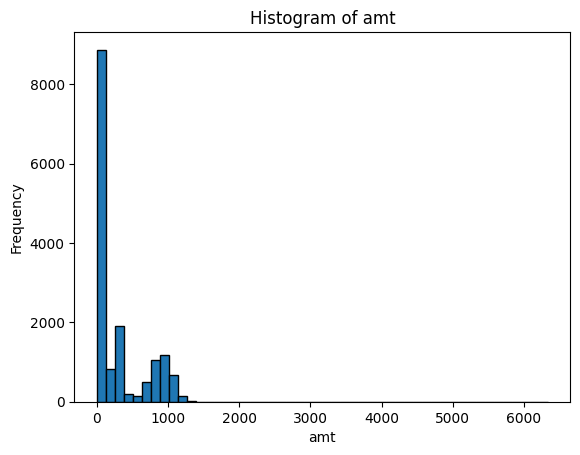

In [13]:
# Amount column Distribution
amount_tx_desc = fraud_txn_df['amt'].describe()
print("Amount field details ",amount_tx_desc)

# histogram of amt column
fraud_txn_df['amt'].plot(kind='hist', bins=50, edgecolor='k')
plt.xlabel('amt')
plt.title('Histogram of amt')
plt.show()

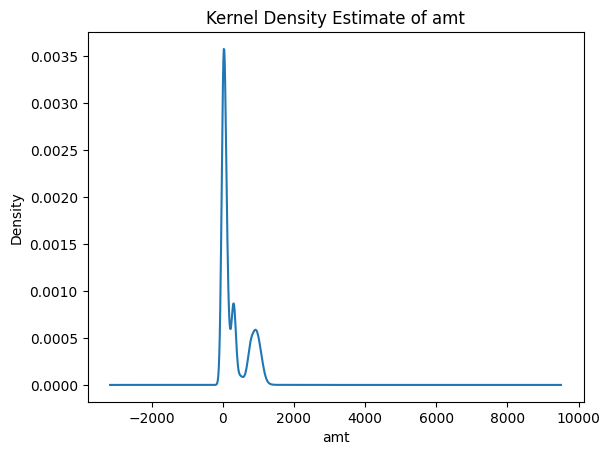

In [14]:
# kde of amt column
fraud_txn_df['amt'].plot(kind='kde')
plt.xlabel('amt')
plt.title('Kernel Density Estimate of amt')
plt.show()

In [15]:
def summarize_col_dat(series):
    stats = series.describe()
    skew = series.skew()
    kurt = series.kurt()
    return {'describe': stats, 'skew': skew, 'kurt': kurt}

summary_amt = summarize_col_dat(fraud_txn_df['amt'])
print(summary_amt['describe'])
print('Amt Skew:', summary_amt['skew'], 'Amt Kurtosis:', summary_amt['kurt'])

count    15506.000000
mean       292.231916
std        370.867673
min          1.000000
25%         20.170000
50%         85.785000
75%        391.812500
max       6337.250000
Name: amt, dtype: float64
Amt Skew: 1.5209015934231853 Amt Kurtosis: 5.962356403236912


In [16]:
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,transaction_distance
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,0,673 Delgado Burg,...,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0,54.728346,29.515545
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,0,7290 Ashlee Keys,...,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1,39.649269,57.726872
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,1,9824 Mitchell Run,...,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1,66.017589,49.590264
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,1,372 Jeffrey Course,...,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0,38.159410,12.174463
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,0,0110 Ashley Forest,...,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0,20.562977,59.819483


Normal Amount details  count    8000.000000
mean       67.907435
std       139.727967
min         1.000000
25%         9.680000
50%        47.925000
75%        82.982500
max      6337.250000
Name: amt, dtype: float64


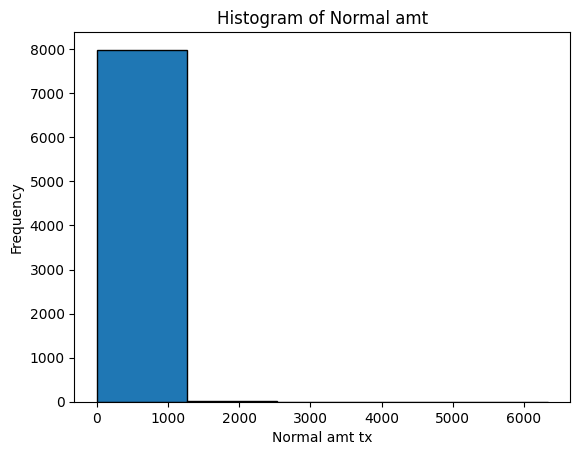

In [17]:
#Visualize the distribution of fraudulent vs. non-fraudulent transactions
normal_tx_amt = fraud_txn_df[fraud_txn_df['is_fraud'] == 0]['amt']
# Normal Amount column Distribution
print("Normal Amount details ",normal_tx_amt.describe())
# histogram of normal amt tx column
normal_tx_amt.plot(kind='hist', bins=5, edgecolor='k')
plt.xlabel('Normal amt tx')
plt.title('Histogram of Normal amt')
plt.show()


Fraud Amount details  count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64


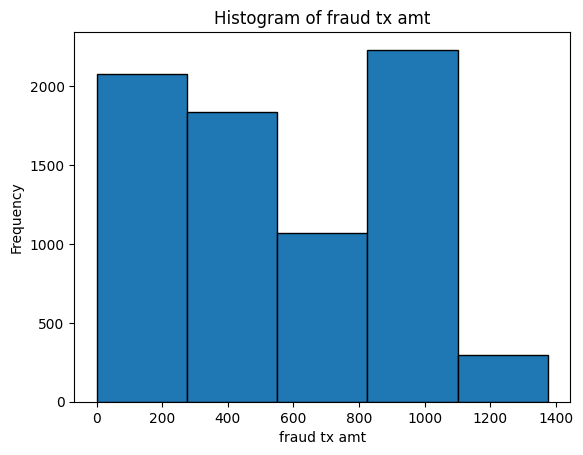

In [18]:
# EDA
# Normal Amount column Distribution
fraud_tx_amt = fraud_txn_df[fraud_txn_df['is_fraud'] == 1]['amt']
print("Fraud Amount details ",fraud_tx_amt.describe())

# histogram of normal amt tx column
fraud_tx_amt.plot(kind='hist', bins=5, edgecolor='k')
plt.xlabel('fraud tx amt')
plt.title('Histogram of fraud tx amt')
plt.show()

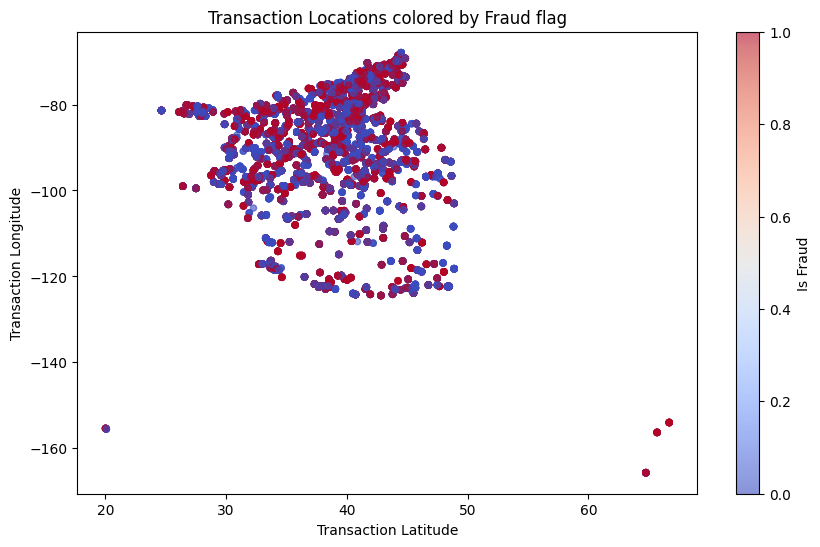

In [19]:
# Geospatial Analysis:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(fraud_txn_df['lat'], fraud_txn_df['long'], c=fraud_txn_df['is_fraud'], cmap='coolwarm', alpha=0.6, s=20)
plt.colorbar(scatter, label='Is Fraud')
plt.xlabel('Transaction Latitude')
plt.ylabel('Transaction Longitude')
plt.title('Transaction Locations colored by Fraud flag')
plt.show()


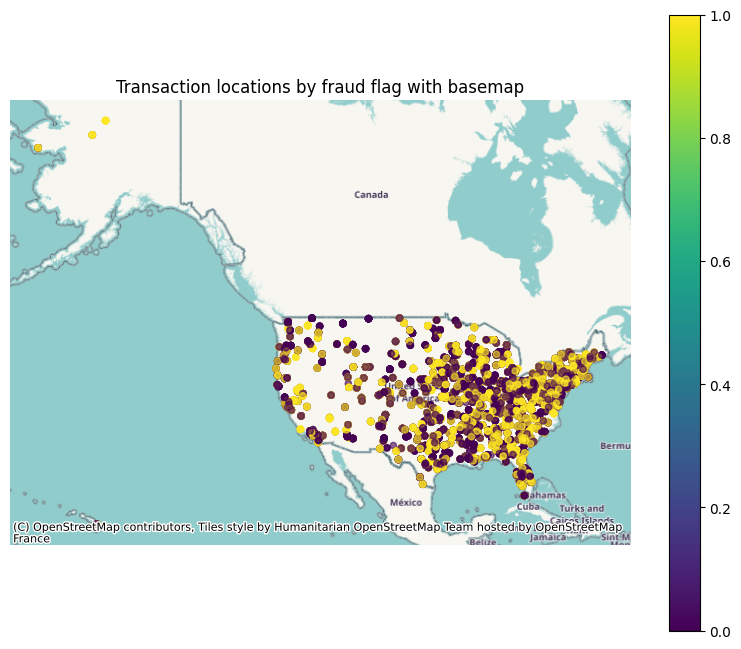

In [20]:
# Geospatial Analysis:
# Create GeoDataFrame of transactions
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
gdf = gpd.GeoDataFrame(
    fraud_txn_df,
    geometry=gpd.points_from_xy(fraud_txn_df.long, fraud_txn_df.lat),
    crs='EPSG:4326'
)
# If you also want merchant points, you can create another layer similarly.

# Convert to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(ax=ax, column='is_fraud', categorical=False, legend=True, alpha=0.6, markersize=20, cmap='viridis')
ctx.add_basemap(ax)
ax.set_axis_off()
plt.title('Transaction locations by fraud flag with basemap')
plt.show()

In [21]:
# Fraud trends over time

# Ensure datetime parsing
fraud_txn_df['trans_date_trans_time'] = pd.to_datetime(fraud_txn_df['trans_date_trans_time'], errors='coerce')
print("Fraud data shape : ",fraud_txn_df['trans_date_trans_time'].shape)

# Drop rows with invalid timestamps or fraud flag
fraud_txn_time_dat_df = fraud_txn_df.dropna(subset=['trans_date_trans_time', 'is_fraud'])

# Set time-based index for easy resampling. Index - trans_date_trans_time column
fraud_txn_time_dat_df = fraud_txn_time_dat_df.set_index('trans_date_trans_time')

print("Fraud data shape after indexing : ",fraud_txn_df['trans_date_trans_time'].shape)

# Daily counts
# groups the DataFrame by calendar days using a DateOffset frequency of 'D' (day-level granularity)
# Groups the 'is_fraud' column  against 'trans_date_trans_time' column with sum and count aggrgate function values.
daily = fraud_txn_time_dat_df.groupby(pd.Grouper(freq='D'))['is_fraud'].agg(['sum', 'count'])
# daily data with columns - trans_date_trans_time sum count

daily.rename(columns={'sum': 'fraud_count', 'count': 'total_count'}, inplace=True)
# rate of fraud count i.e. (sum of fraud count per time instance of day) / (total transactions per the same time instance of day)
daily['fraud_rate'] = daily['fraud_count'] / daily['total_count']

print(daily.head())
print(daily.count)


Fraud data shape :  (15506,)
Fraud data shape after indexing :  (15506,)
                       fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
<bound method DataFrame.count of                        fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
...                            ...          ...       

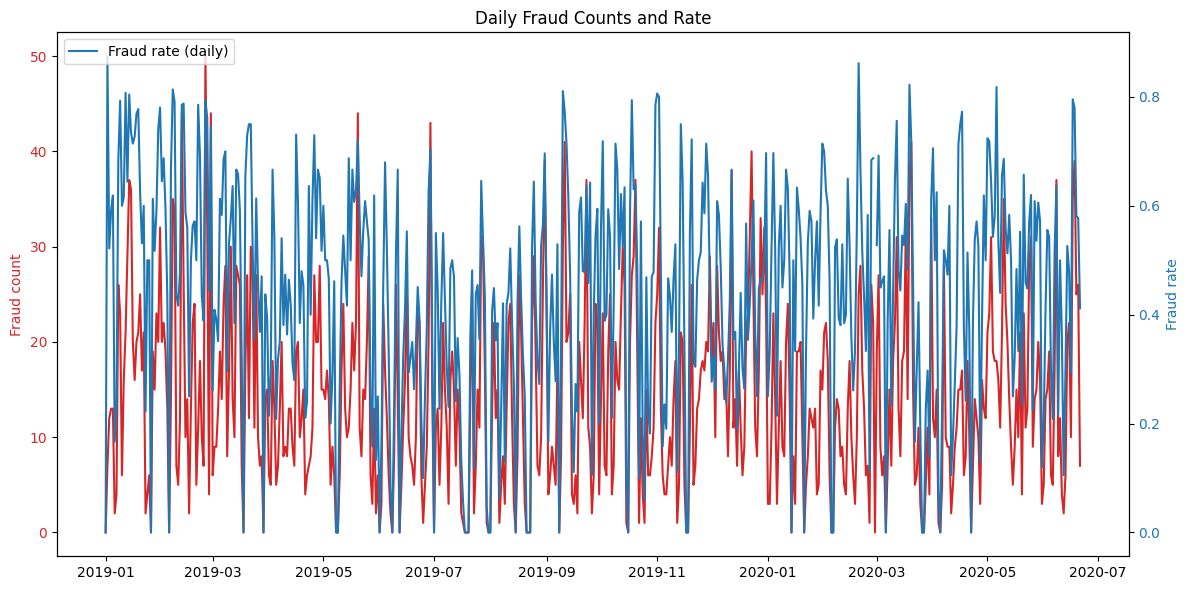

In [22]:

# Plot fraud count and rate over time
fig, ax1 = plt.subplots(figsize=(12,6))

# Red line - fraud count
ax1.plot(daily.index, daily['fraud_count'], color='tab:red', label='Fraud count (daily)')
ax1.set_ylabel('Fraud count', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Blue line - fraud rate
ax2 = ax1.twinx()
ax2.plot(daily.index, daily['fraud_rate'], color='tab:blue', label='Fraud rate (daily)')
ax2.set_ylabel('Fraud rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Daily Fraud Counts and Rate')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [23]:
#### Examine correlations between features and the target is_fraud
###
# Identify target and features
fraud_txn_df_sample100 = pd.read_csv("fraud_txn_100_Recrds.csv")
fraud_txn_df_sample100.head()
target = 'is_fraud'
y = fraud_txn_df_sample100[target]

# Separate features (drop target)
X = fraud_txn_df_sample100.drop(columns=[target])

# Handle categorical features: one-hot encode (this keeps it simple)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Align columns in case of train/test splits (optional but good practice)
X_encoded, y_aligned = X_encoded.align(y, join='left', axis=0, fill_value=0)


# Compute correlations with the target
# Note: Correlation only works with numeric data; y is numeric (0/1)
corr_matrix = pd.concat([X_encoded, y], axis=1).corr()

# Extract correlations with the target
corr_with_target = corr_matrix[target].drop(index=target).sort_values(ascending=False)

print("Top features correlated with is_fraud (by Pearson correlation):")
print(corr_with_target.head(20))

# Optional: simple filter for strong effects (absolute corr above a threshold)
threshold = 0.1
strong_features = corr_with_target[abs(corr_with_target) >= threshold]
print("\nFeatures with |correlation| >= {}:".format(threshold))
print(strong_features)

# If you want a quick numeric summary per feature:
summary = pd.DataFrame({
    'feature': corr_with_target.index,
    'correlation_with_is_fraud': corr_with_target.values
})
print("\nSummary (feature, corr):")
print(summary.head(10))

Top features correlated with is_fraud (by Pearson correlation):
amt                                0.672439
category_shopping_net              0.278855
Unnamed: 0                         0.167487
state_SC                           0.163230
category_shopping_pos              0.144466
category_grocery_pos               0.132948
state_VT                           0.132602
state_CO                           0.132602
first_Larry                        0.132602
state_MD                           0.132602
job_Scientist, marine              0.132602
merchant_fraud_DuBuque LLC         0.132602
last_Robinson                      0.132602
first_Christie                     0.132602
merchant_fraud_Quitzon-Goyette     0.132602
job_Medical technical officer      0.132602
city_Monitor                       0.132602
job_Prison officer                 0.132602
dob_1994-07-27                     0.132602
street_053 Kim Valley Suite 928    0.132602
Name: is_fraud, dtype: float64

Features with |correlati